# CSDS 340 Case Study 1
*Report by Prateek Dullur and Robbie Hammond*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score
import numpy as np
from classifySpam import aucCV, predictTest
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import multiprocessing
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
df = pd.read_csv('spamTrain1.csv')
df.columns = np.arange(0,31)
df.rename(columns={30:'Target'})

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,0.0074,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0036,0.0,0.0,0.0074,0.0000,0.0000,0.0000,0
1,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0040,0.0000,0.0000,...,0.0000,0.0081,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0
2,0.0000,0.0202,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0
3,0.0000,0.0000,0.000,0.0019,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0009,0.0000,0.0016,0.0,0.0,0.0000,0.0000,0.0000,0.0038,0
4,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0038,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0000,0.0000,0.000,0.0014,0.0044,0.0,0.0000,0.0067,0.0003,0.0044,...,0.0000,0.0000,0.0067,0.0,0.0,0.0003,0.0003,0.0056,0.0029,1
1495,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0057,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0031,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0
1496,0.0036,0.0000,0.000,0.0036,0.0036,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0036,0
1497,0.0000,0.0000,0.002,0.0031,0.0020,0.0,0.0000,0.0052,0.0020,0.0020,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0166,0.0104,0.0052,1


Let us do some basic exploratory data analysis first

In [3]:
df[30].value_counts()

0    878
1    621
Name: 30, dtype: int64

<AxesSubplot:>

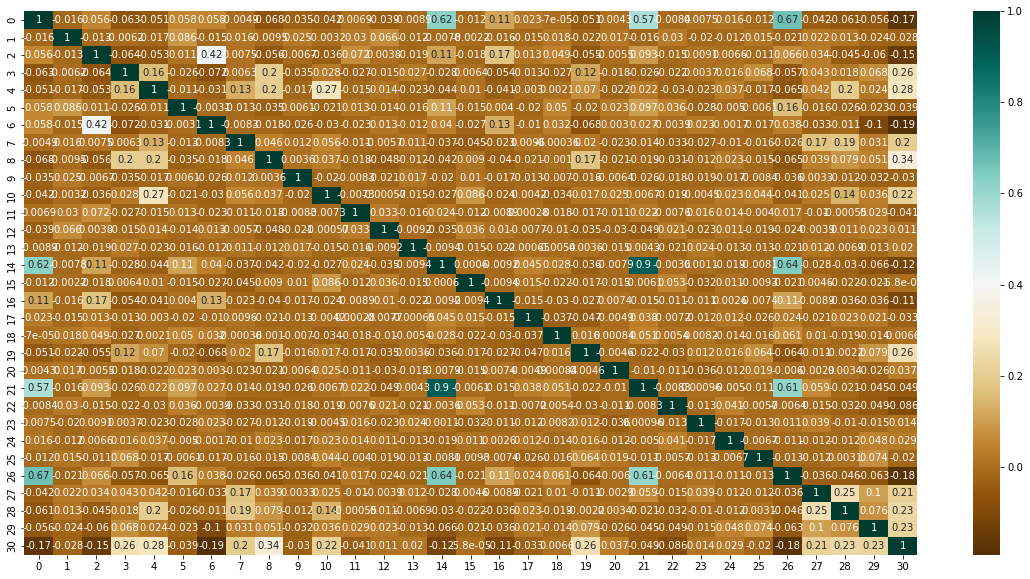

In [4]:
pl.figure(figsize=(20,10));
c= df.corr();
sns.heatmap(c,cmap="BrBG",annot=True)

This heatmap helps us get a sense of the data and what variables may be correlated. Just looking at the data, it seems that perhaps a decision tree based model could work - perhaps in conjuction with an ensemble model

In [5]:
data = np.loadtxt('spamTrain1.csv',delimiter=',')

# Randomly shuffle rows of data set then separate labels (last column)
np.random.seed(1)
shuffleIndex = np.arange(np.shape(data)[0])
np.random.shuffle(shuffleIndex)
data = data[shuffleIndex,:]
features = data[:,:-1]
labels = data[:,-1]


# Arbitrarily choose all odd samples as train set and all even as test set
# then compute test set AUC for model trained only on fixed train set
# Code from Kevin S. Xu
trainFeatures = features[0::2,:]
trainLabels = labels[0::2]
testFeatures = features[1::2,:]
testLabels = labels[1::2]

First, let's try an SVM model. We can use Grid Search to find the best parameters for the classifier

In [6]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
print("10-fold cross-validation mean AUC: ", np.mean(aucCV(trainFeatures,trainLabels, model=svm)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
10-fold cross-validation mean AUC:  0.9081598089843969


In [7]:
# fitting the model for grid search
svm.fit(trainFeatures, trainLabels)
print("Best parameters:{}".format(svm.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters:{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [8]:
clf = SVC(C=1000, gamma=1, kernel='rbf', probability=True)
# Fit classifier to training data
clf.fit(trainFeatures, trainLabels)
# Test on testing set
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures, model=clf)
print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))

Test set AUC:  0.9012043126137427


Okay, not bad. The Naive Bayes' classifier had a test set accuracy of 0.83, so we're already seeing a significant improvement

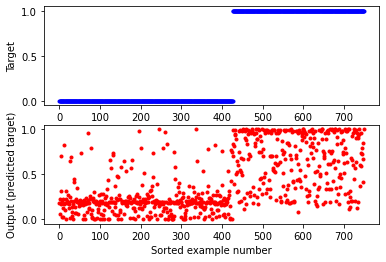

In [9]:
# Examine outputs compared to labels (code from Kevin S. Xu)
sortIndex = np.argsort(testLabels)
nTestExamples = testLabels.size
plt.subplot(2,1,1)
plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
plt.xlabel('Sorted example number')
plt.ylabel('Target')
plt.subplot(2,1,2)
plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
plt.xlabel('Sorted example number')
plt.ylabel('Output (predicted target)')
plt.show()

Let's now try an XGBoost classifier (as defined by Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785–794). New York, NY, USA: ACM. https://doi.org/10.1145/2939672.2939785)

In order to run this model, your python kernel will need the xgboost package, which is available through pip install xgboost

In [10]:
# Define xgb classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],'n_estimators': [50, 100, 200], 'eta':[0.01, 0.1, 0.3, 1], 'max_bin':[256,512]}, verbose=1, n_jobs=2)
# Evaluating classifier accuracy using 10-fold cross-validation
print("10-fold cross-validation mean AUC: ", np.mean(aucCV(trainFeatures,trainLabels, model=clf)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
10-fold cross-validation mean AUC:  0.9267818868343607


In [11]:
clf.fit(trainFeatures, trainLabels)
print("Best parameters:{}".format(clf.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:{'eta': 0.1, 'max_bin': 256, 'max_depth': 4, 'n_estimators': 100}


In [12]:
clf = xgb.XGBClassifier(max_depth=4, eta=0.1, max_bin=256, n_estimators=100, objective='binary:logistic')    
# Fit classifier to training data
clf.fit(trainFeatures, trainLabels)
# Test on testing set
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures, model=clf)
print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))

Test set AUC:  0.9377650974108367


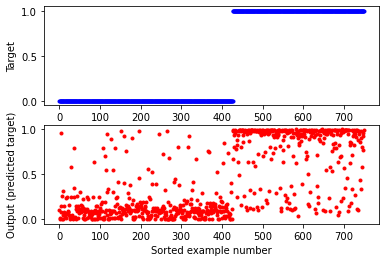

In [13]:
# Examine outputs compared to labels (code from Kevin S. Xu)
sortIndex = np.argsort(testLabels)
nTestExamples = testLabels.size
plt.subplot(2,1,1)
plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
plt.xlabel('Sorted example number')
plt.ylabel('Target')
plt.subplot(2,1,2)
plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
plt.xlabel('Sorted example number')
plt.ylabel('Output (predicted target)')
plt.show()

A gradient boosted ensemble decision tree model appears to be the most effective (at least compared to SVM and Naive Bayes)